<a href="https://colab.research.google.com/github/mosesandrian/TensorFlowDeveloperCourse/blob/main/Course%201/TensorFlowDev_C1W4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using Real World Images**

***dont try to edit this! image will load in text form***

limitation: datasets of very uniform images

try: horses v. humans
> point at a directory -- subdirectories will automatically generate labels for you.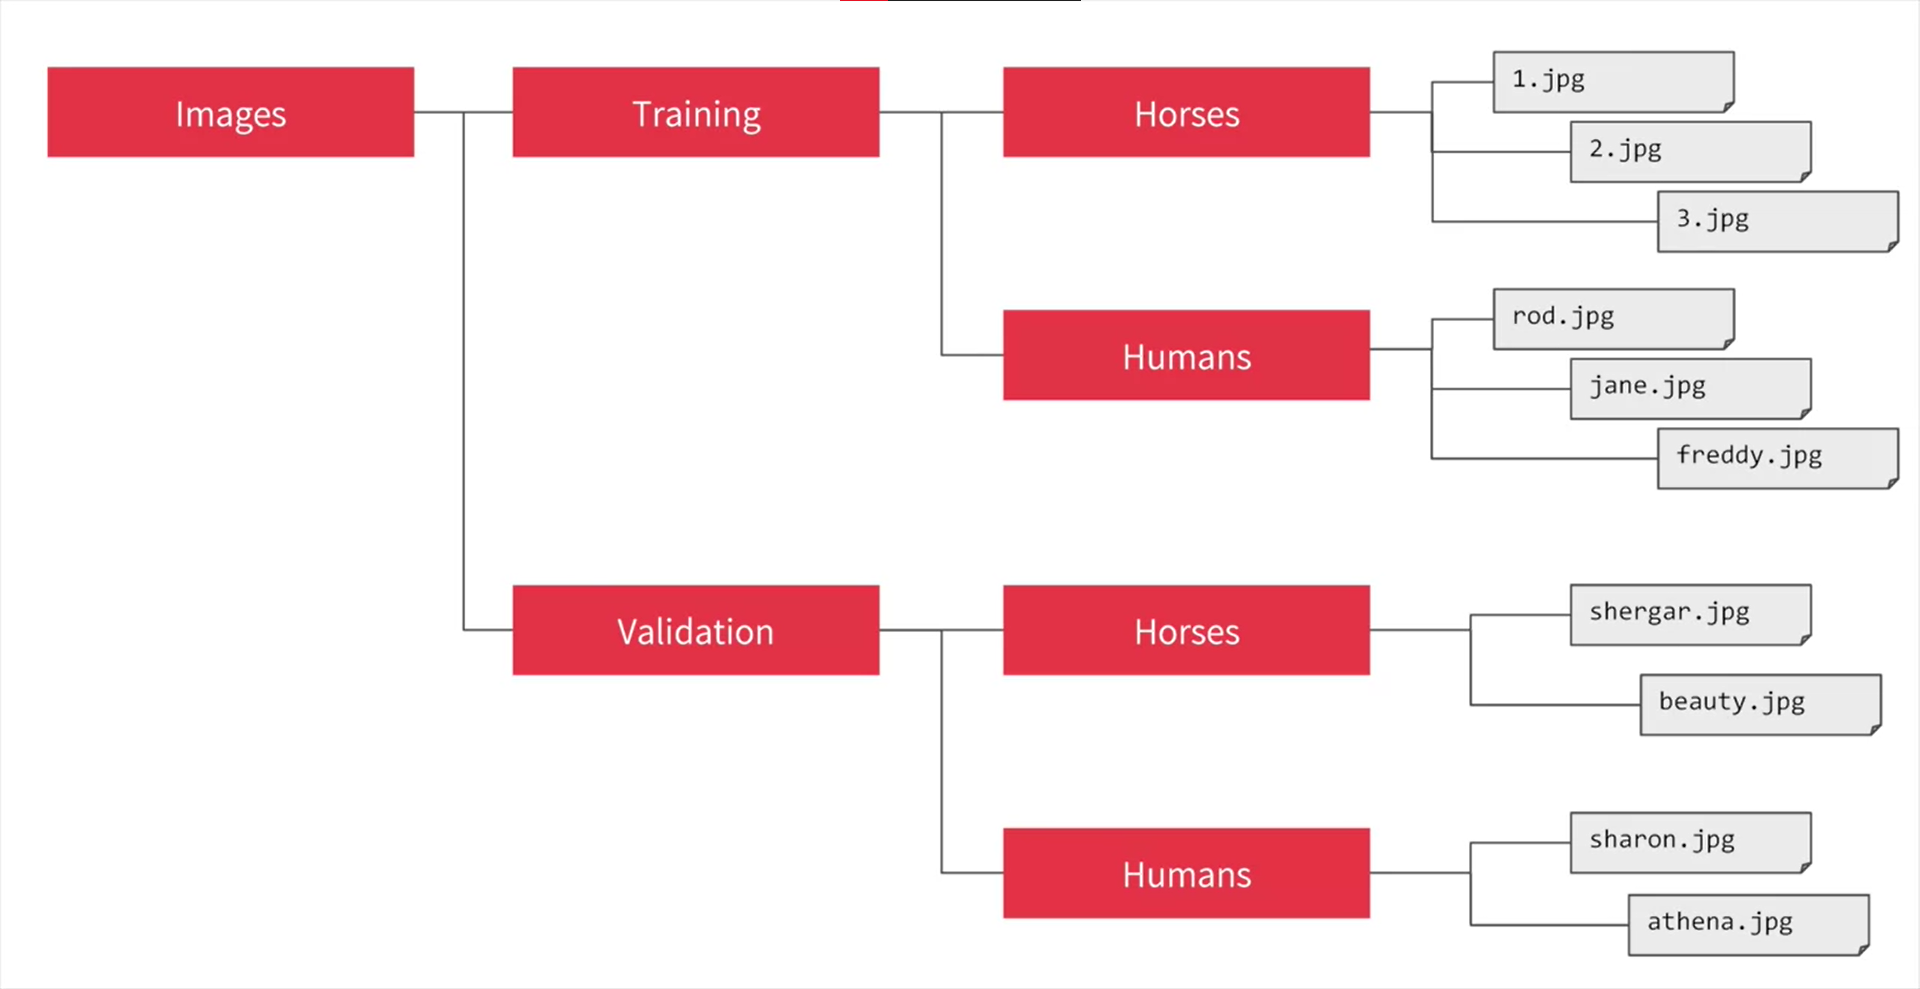


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(  # to load images from that directory
    train_dir,
    target_size=(300,300), # use all same size image. pre-processed as it is loaded
    batch_size=128, # all in batches. try to experiment with different numbers
    class_mode='binary' # other options:
)

`train_datagen = ImageDataGenerator(rescale=1./255)`
- to instantiate image generator
- `rescale` to normalize the data

**DO NOT POINT GENERATOR TO SUB-DIRECTORIES**
- *the name of the sub-directories would be your labels*



In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
    validation_dir, # points at different directory containing the sub-dirs of images
    target_size=(300,300), # use all same size image. pre-processed as it is loaded
    batch_size=128, # all in batches. try to experiment with different numbers
    class_mode='binary' # other options:
)

## **Neural Network for complex images**


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',
                           input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

`tf.keras.layers.Conv2D(16, (3,3), activation='relu',
                           input_shape=(300,300,3)),`

> these are 300x300 color images (RGB), which means 3 bytes per pixel

`tf.keras.layers.Dense(1, activation='sigmoid')`

> output layer changed! 1 output for 2 classes: sigmoid for binary classifications!

try and use `model.summary()`

## **Training ConvNet with `fit_generator`**

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001), # may tweak learning rate (lr)
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=8,
    verbose=2
)

- `train_generator` this is the image generator from earlier.

- currently, there are 1,024 images in the training dir. we use 128 images per batch, therefore: `steps_per_epoch = 1024/128 = 8`

- and on the other hand there are 256 test images. we use 32 images per batch, therefore: `validation_steps = 256/32 = 8`

- `verbose=2` how much to display while training, little less animation.



In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300,300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0] > 0.5:
    print(fn+' is a human')
  else:
    print(fn+' is a horse')

```
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
```
> these are specific to Google Colab

```
img = image.load_img(path, target_size=(300,300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
```
> for loading an image and inputting it into the model. dimensions specified should match with the model design

`model.predict(images, batch_size=10)`
> will return array of classes. 0 or 1.

## **Humans vs. Horses Exercise**

https://colab.sandbox.google.com/github/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%208%20-%20Lesson%203%20-%20Notebook.ipynb

### **Unzipping file and Directory Placement**



In [ ]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

### **Drawing the pictures**

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# **Exercise 4 - Happy or Sad**

In [ ]:
import tensorflow as tf
import os
import zipfile
from os import path, getcwd, chdir

# DO NOT CHANGE THE LINE BELOW. If you are developing in a local
# environment, then grab happy-or-sad.zip from the Coursera Jupyter Notebook
# and place it inside a local folder and edit the path to that location
path = f"{getcwd()}/../tmp2/happy-or-sad.zip"

zip_ref = zipfile.ZipFile(path, 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

In [ ]:
def train_happy_sad_model():

    DESIRED_ACCURACY = 0.999

    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs={}):
            if(logs.get('acc')>0.999):
                print("\nReached 99.9% accuracy so cancelling training!")
                self.model.stop_training = True
    callbacks = myCallback()
    
    # This Code Block should Define and Compile the Model. Please assume the images are 150 X 150 in your implementation.
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu',
                              input_shape=(150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    from tensorflow.keras.optimizers import RMSprop

    model.compile(loss='binary_crossentropy',
                  optimizer=RMSprop(lr=0.001),
                  metrics=['acc'])

    # This code block should create an instance of an ImageDataGenerator called train_datagen 
    # And a train_generator by calling train_datagen.flow_from_directory

    from tensorflow.keras.preprocessing.image import ImageDataGenerator

    train_datagen = ImageDataGenerator(rescale=1/255)

    # Please use a target_size of 150 X 150.
    train_generator = train_datagen.flow_from_directory(
        '/tmp/h-or-s/',
        target_size=(150,150),
        batch_size=10,
        class_mode='binary'
    )
    # Expected output: 'Found 80 images belonging to 2 classes'
    
    # model fitting
    history = model.fit_generator(
        train_generator,
        steps_per_epoch = 8,
        epochs=15,
        verbose=2,
        callbacks=[callbacks]
    )
    # model fitting
    return history.history['acc'][-1]

In [ ]:
train_happy_sad_model()